<span style='font-size:20px'>

# Creating an End-to-End Data Science Project in Python3

</span>

---

<span style='font-size:22px'>This code was written by **Edmar Junyor Bevilaqua**, if you want to know a little more about me, feel free to visit my social media:</span>
* <a href="https://www.linkedin.com/in/edmar-bevilaqua/"><span style='font-size:22px'>LinkedIn</span></a>
* <a href="https://github.com/edmar-bevilaqua"><span style='font-size:22px'>GitHub</span></a>
* <a href="https://www.instagram.com/edmar_bevilaqua/"><span style='font-size:22px'>Instagram</span></a>

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

<span style='font-size:25px'><strong>Note:</strong></span><br>
<span style='font-size:20px'>The following function was created based on the book _"Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow"_, written by <a href="https://github.com/ageron">**Aurélien Géron**</a> and published by <a href="https://www.oreilly.com/">**O'Reilly**</a></span>. <br>
<span style='font-size:20px'>This book inspired me to learn more and more about Data Science.</span>
<br>
<span style='font-size:25px'>

## But what the function _load_data_file()_ actually do?
    
</span>
<span style='font-size:20px'>It will look at the directory where the .ipynb file is running and check if theres a directory called **_/datasets/_** with a file called **_housing.tgz_**, if it does not exists, the code will download it from the web with the url passed inside the function. <br>
It will then extract all the contents inside the .tgz file and finally it will return a DataFrame.</span>

In [2]:
def load_data_file():
    data_path = Path("datasets/housing.tgz")
    if not data_path.is_file():
        Path("./datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, data_path)
        with tarfile.open(data_path) as housing_tarball:
            housing_tarball.extractall(path="./datasets")
    return pd.read_csv(Path("./datasets/housing/housing.csv"))

In [3]:
housing = load_data_file()

### Taking a quick look at our data:
---

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<br>

<span style='font-size:20px'>It is possible to see that the feature called "_total_bedrooms_" has 20433 non-null values, while the other features hold 20640 non-null values each. So we will need to check this feature later.<br><br>
Another thing we can look at is the Dtype (data type) of our features. In this case we have just 2 different Dtyes: float64 and object. While float64 is self-explanatory, the "_object_" Dtype can be a little tricky, because it represents any object type from Python, but as we know that the data has came from a .csv file, we know that the _ocean_proximity_ feature is a text feature (string).</span>

<br>

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<br>

<span style='font-size:30px'><strong>Tip:</strong></span>
<br>
<span style='font-size:20px'>We can always use _Data Visualization_ in the beggining of our project to check the behavior of our data</span>

<br>

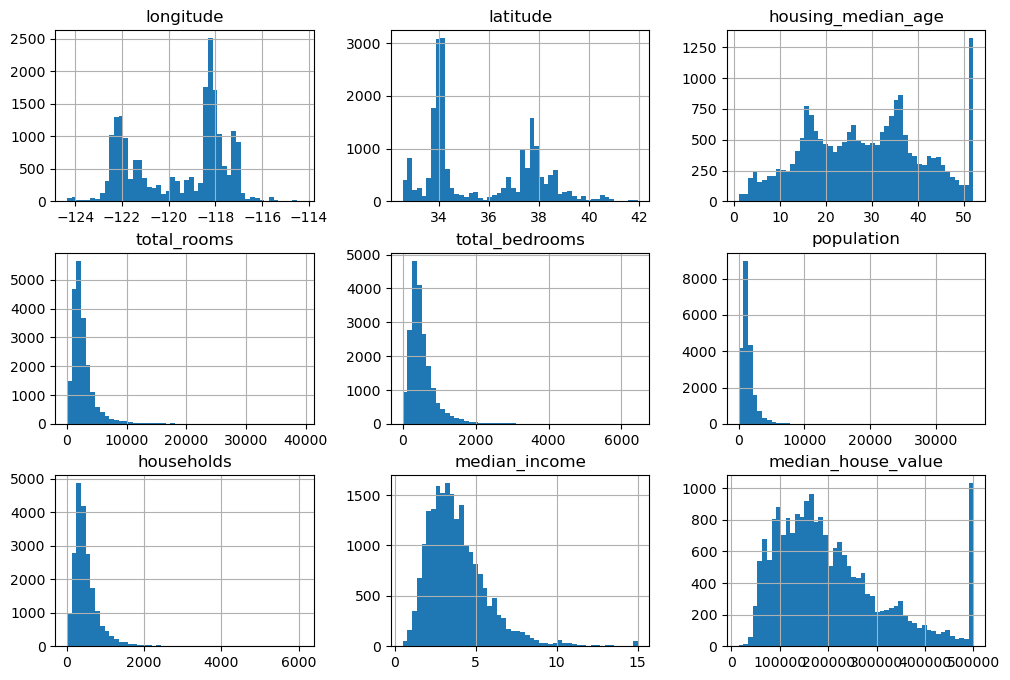

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()

<br>

<span style='font-size:25px'>There are some useful insights we can get from this histogram:</span>
<br>
* <span style='font-size:20px'>The median income attribute does not look like it is being represent in terms of coin values (like USD). After checking with the team that collected the data, we were told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent tens of thousands of dollars (x 10,000$);</span>
* <span style='font-size:20px'>The housing median age and the median house value were also capped, this can be a problem for us, because our Machine Learning algorithms may learn that prices never go beyond that limit;</span>
* <span style='font-size:20px'>These attributes have very different scales;</span>
* <span style='font-size:20px'>Many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns.</span>
<br>
<br>

<span style='font-size:20px'>
    
### Creating a Test Set:

</span>

---

<span style='font-size:20px'>It may seem a little odd to create a test set at this stage of our data science project, but it will help us understanding that the **_Test Set_** is meant to represent a new data, never seen by the algorithm neither by the data scientist.<br>
You problably already know that scikit-learn offers a series of useful tools to manipulate data, such as the _train_test_split_ method, but for educational and practical experiments, we will be coding those methods _by hand_.</span>

In [8]:
import numpy as np

def shuffled_split(data, test_ratio):
    random_indices = np.random.permutation(len(data))
    test_len = int(len(data)*test_ratio) # Number of instances for the test set, defined by the test_ratio
    test_indices = random_indices[:test_len] # Get the indices, shuffled by np.random.permutation from 0 to test_len
    train_indices = random_indices[test_len:] # Get the indices, shuffled by np.random.permutation from test_len to len(data)+1
    
    return data.iloc[train_indices], data.iloc[test_indices]

<br>

<span style='font-size:20px'>

#### There is a problem with the above **_shuffled_split_** method, do you know what it is?

</span>
<span style='font-size:20px'>First of all, if we look at the code, we are calling the _numpy random_, which runs at a random seed every time, so if we run this method multiple times, it will always generate different indices for our train and test sets. It can be a problem if our project needs to re-run the train/test sets more than once.<br>
To solve this, we can compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across  ultiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.</span>
<br>
<br>

In [9]:
from zlib import crc32

def test_set_id_checker(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def shuffled_split_with_id(data, test_ratio, identifier):
    ids = data[identifier]
    is_in_test_set = ids.apply(lambda id_: test_set_id_checker(id_, test_ratio))
    return data.loc[~is_in_test_set], data.loc[is_in_test_set]

<br>

<span style='font-size:20px'>As we don't have a identifier columns in our dataset, we can get one by setting the index as a identifier columns, with the following code:</span>

<br>

In [10]:
housing_with_id = housing.reset_index(drop=False) # This will return the housing DataFrame, but with the index as a column called "index".

<br><span style='font-size:20px'>The only problem in having the index as an identifier columns is that you can't delete rows in the preprocessing phase, because this will re-arange the dataset indices every time it runs the _DataFrame.reset_index()_ method.</span><br><br>

In [11]:
train_set, test_set = shuffled_split_with_id(housing_with_id, 0.2, "index")

<span style='font-size:18px'>

### Sampling the Data Using Stratification

</span>

---

<span style='font-size:18px'>
So far we have considered purely random sampling methods. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias.<br>
    When employees at a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population, with regard to the questions they want to ask. For example, the US population is 51.1% females and 48.9% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 511 females and 489 males (at least if it seems possible that the answers may vary across genders) (ÁGERON, 2023).<br>
    This is called <strong>stratified sampling:</strong> the population is divided into homogeneous subgroups called <i>strata</i>, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. If the people running the survey used purely random sampling, there would be about a 10.7% chance of sampling a skewed test set with less than 48.5% female or more than 53.5% female participants. Either way, the survey results would likely be quite biased.
</span>

In [12]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
housing['income_category'] = pd.cut(housing['median_income'],
                                    bins = [0., 1.5, 3., 4.5, 6., np.inf],
                                    labels = [1, 2, 3, 4, 5])

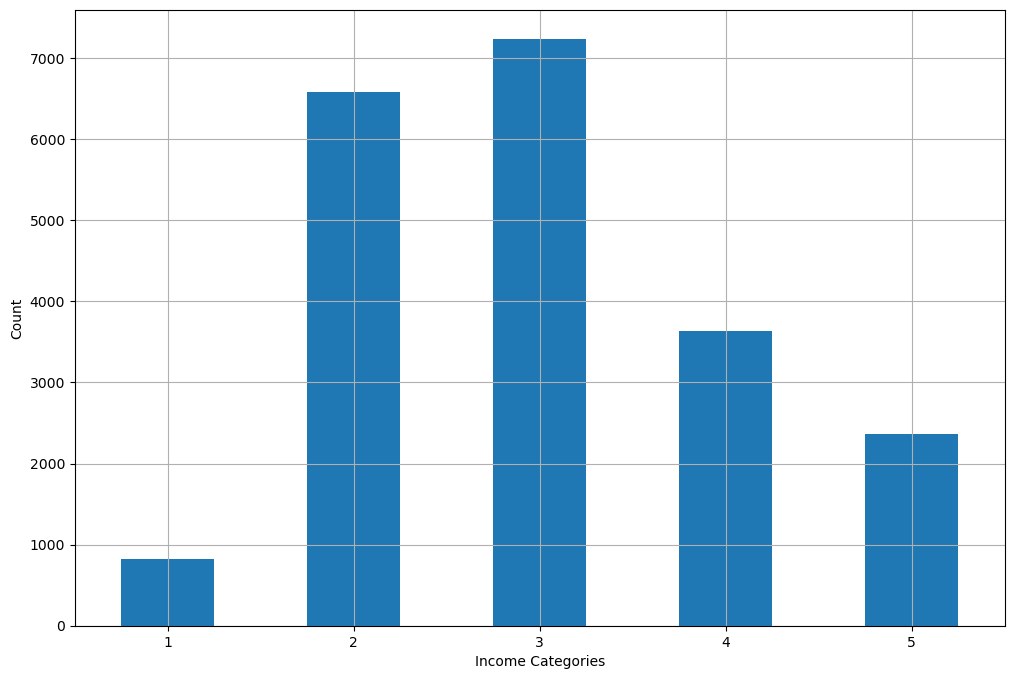

In [14]:
housing['income_category'].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(12, 8))
plt.xlabel("Income Categories")
plt.ylabel("Count")
plt.show()

<br>

<span style='font-size:18px'>
We can use the Class StratifiedShuffleSplot from Sklearn.model_selection to help us do the stratified split in our dataset
</span>
<br>
<br>

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=192)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_category']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
    strat_splits.append([strat_train_set, strat_test_set])

In [16]:
strat_train, strat_test = strat_splits[0]

In [17]:
strat_train['income_category'].value_counts()/len(strat_train['income_category'])

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_category, dtype: float64

In [18]:
strat_test['income_category'].value_counts()/len(strat_test['income_category'])

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_category, dtype: float64

<br><br>
<span style='font-size:16px'>The main reason we generated the "income_category" column was to sample the train and the test set in a stratified way, granting the same proportions from the original dataset "housing".</span>

In [19]:
for set_ in (strat_train, strat_test):
    set_.drop("income_category", axis=1, inplace=True)

C:\Users\edmar\AppData\Local\Temp\ipykernel_5664\1503569653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_category", axis=1, inplace=True)
C:\Users\edmar\AppData\Local\Temp\ipykernel_5664\1503569653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_category", axis=1, inplace=True)


# Data Visualization:
---

-### Describe here some cool things about Data Visualization ###-

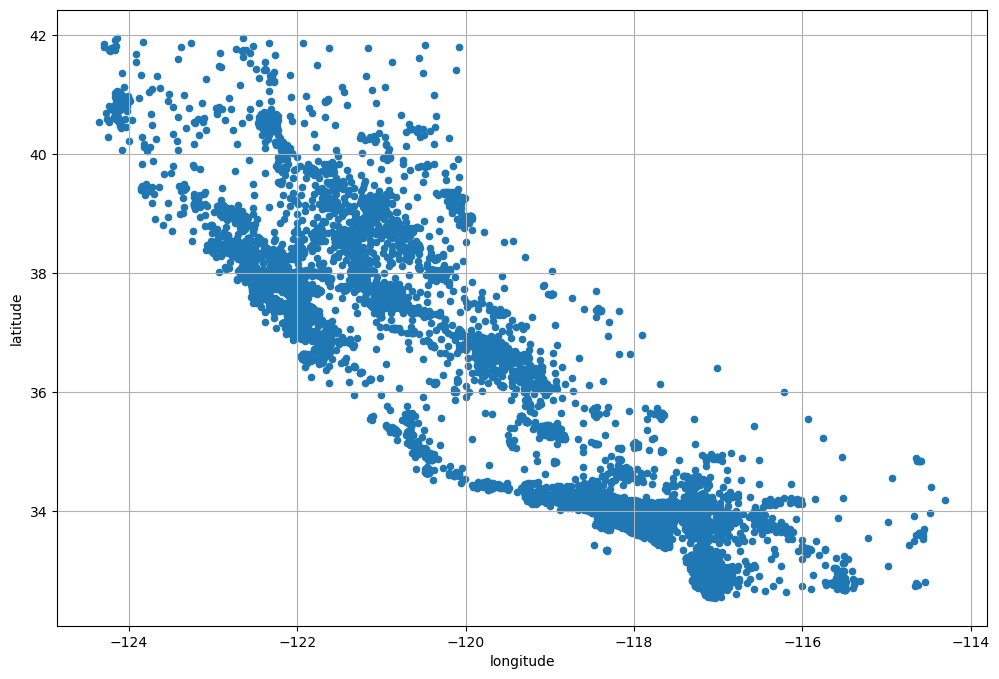

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, figsize=(12,8))
plt.show()

<span style='font-size:16px'>The above visualization is prety raw, and that makes it hard to really get somes insights from, so why don't we enhance the image with colors, opacity and a feature to complement the information?</span>

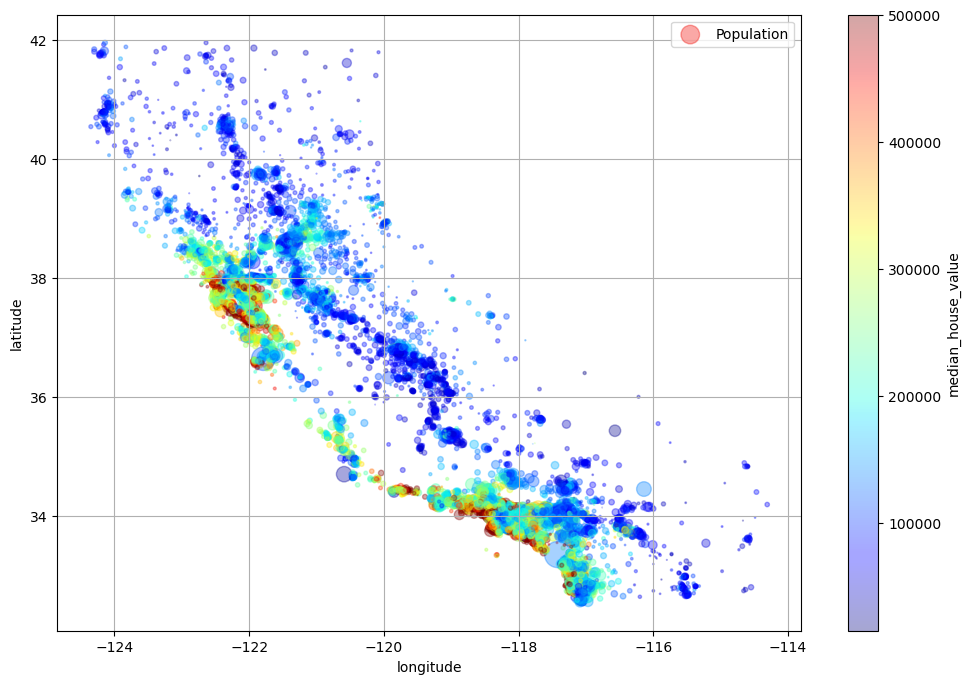

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             grid=True, figsize=(12,8), s=housing["population"]/100,
             label="Population", c="median_house_value", cmap="jet",
             alpha=0.35, colorbar=True, legend=True, sharex=False)
plt.show()

<br>
<span style='font-size:16px'>Looking for correlations (as known as _Pearson's r_) between every attribute.</span> <br>
<br>
<span style='font-size:16px'>Note: There is no problem on calculating the correlation between every feature (attribute) on small datasets (like ours!), but when we are dealing with enormous datasets, the correlation is a metric that must be precisely calculated between selected features.</span>

In [22]:
correlation_matrix = housing.corr(numeric_only=True)

In [23]:
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<br><br>
<span style='font-size:16px'>Another way of seeing the correlation is by using the scatter matrix provided by _pandas.plotting_:</span> <br>
<span style='font-size:16px'>It shows every selected numerical features put against all other selected numerical features:</span>

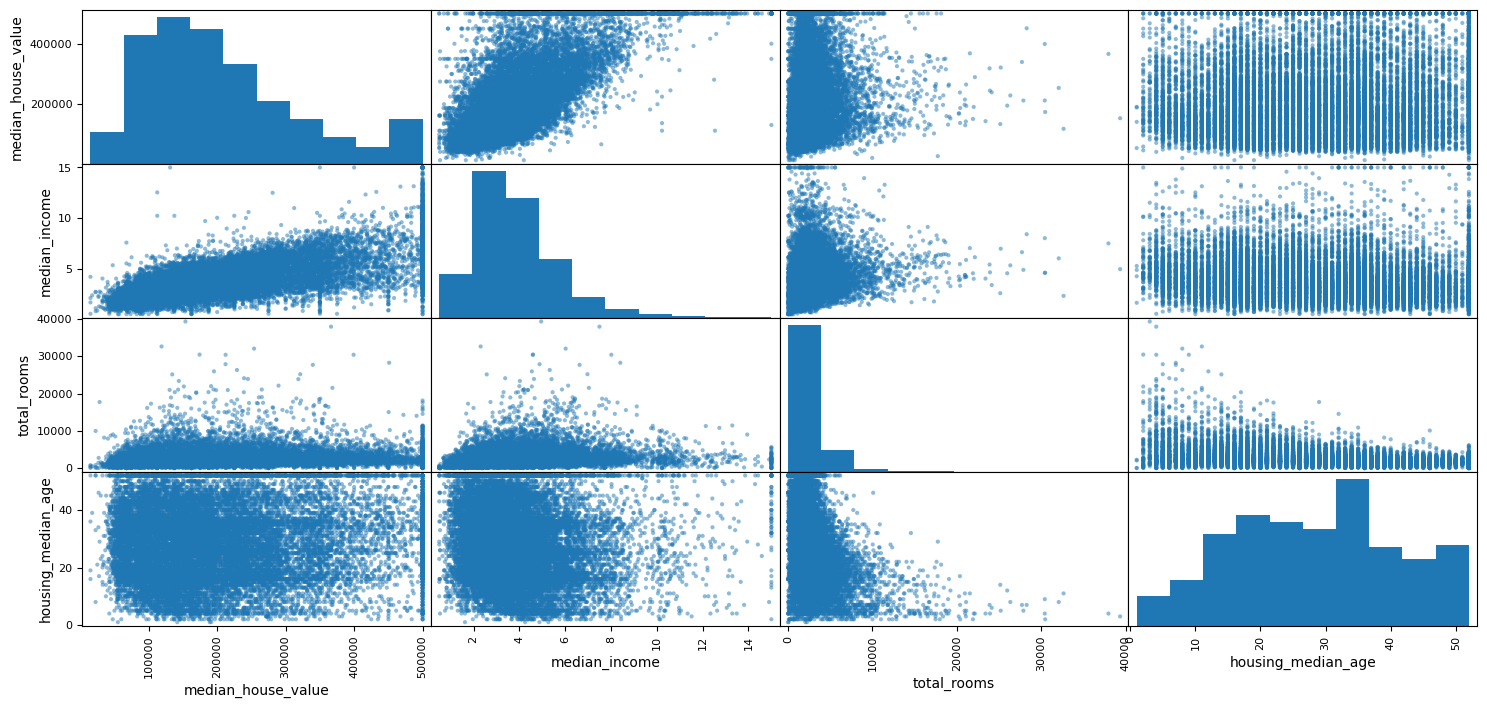

In [24]:
from pandas.plotting import scatter_matrix


features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"] # here is where we select what features are going to our matrix.

scatter_matrix(housing[features], figsize=(18,8))
plt.show()

<br><br>
<span style='font-size:16px'>By looking at the above plot, we can check see that the most realiable feature to predict the "median_house_value" is problably the "median_income", so lets zoom on it!</span>

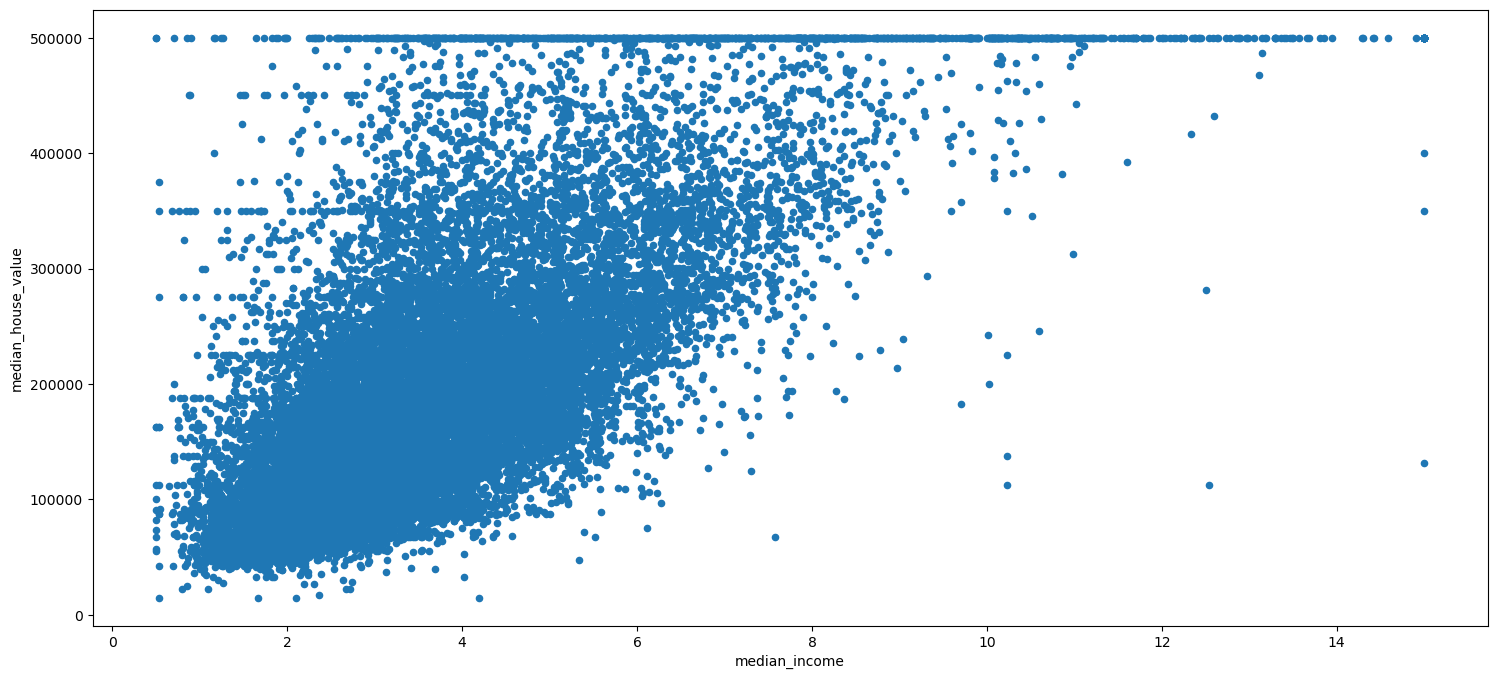

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(18,8))

plt.show()

<br><br>
<span style='font-size:18px'>Other cool thing to do with our dataset is experiments. Lets think about some topics for a moment: <br>
* <span style='font-size:16px'>The feature "total_rooms" only shows the amount of rooms that were counted at the respective district, which is not usually a useful information. But if we look at our dataset, we can see that we have a feature called "households" which is the count ou households in that district. So if we think about this for a while, we can conclude that it is much more useful to have a metric that give us the average amount of rooms per house in the districts, right?</span>
* <span style='font-size:16px'>Following the same logic, we notice that we have the feature "total_bedrooms", with that we can estimate the average amount of bedrooms per household, or even the average proportion corresponded by bedrooms in a single household;</span>
* <span style='font-size:16px'>Last but not least we have the feature "population", so we can estimate the average number of peoples per household.</span>

In [26]:
housing["average_rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing['bedroom_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [27]:
correlation_matrix = housing.corr(numeric_only=True)
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.688075
average_rooms_per_house    0.151948
total_rooms                0.134153
housing_median_age         0.105623
households                 0.065843
total_bedrooms             0.049686
people_per_house          -0.023737
population                -0.024650
longitude                 -0.045967
latitude                  -0.144160
bedroom_ratio             -0.255880
Name: median_house_value, dtype: float64

<br><span style='font-size:18px'>Hey, not bad! The new bedrooms_ratio attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district. Obviously the larger the houses, the more expensive they are.</span>

<br>

## Creating a similarity value based on k-means for longitude and latitude:
---
<span style='font-size:18px'>This code creates a ClusterSimilarity transformer, setting the number of clusters to 10. Then it calls fit_transform() with the latitude and longitude of every district in the training set, weighting each district by its median house value. The transformer uses k-means to locate the clusters, then measures the Gaussian RBF similarity between each district and all 10 cluster centers. The result is a matrix with one row per district, and one column per cluster. Let’s look at the first three rows, rounding to two decimal places:</span>

In [28]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

class SimilarityCluster(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None): # Creating the __init__ method.
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state=self.random_state, n_init='auto') # Here we create a instance o KMeans inside our SimilarityCluster Class.
        self.kmeans_.fit(X, sample_weight=sample_weight) # Here we fit our KMeans.
        return self # Always return self !!!
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} Similarity" for i in range(self.n_clusters)]

In [29]:
housing = strat_train_set.drop(columns=['median_house_value'])
housing_labels = strat_train_set['median_house_value'].copy()

In [30]:
cluster_similarity = SimilarityCluster(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_similarity.fit_transform(housing[['latitude', 'longitude']], sample_weight=housing_labels)

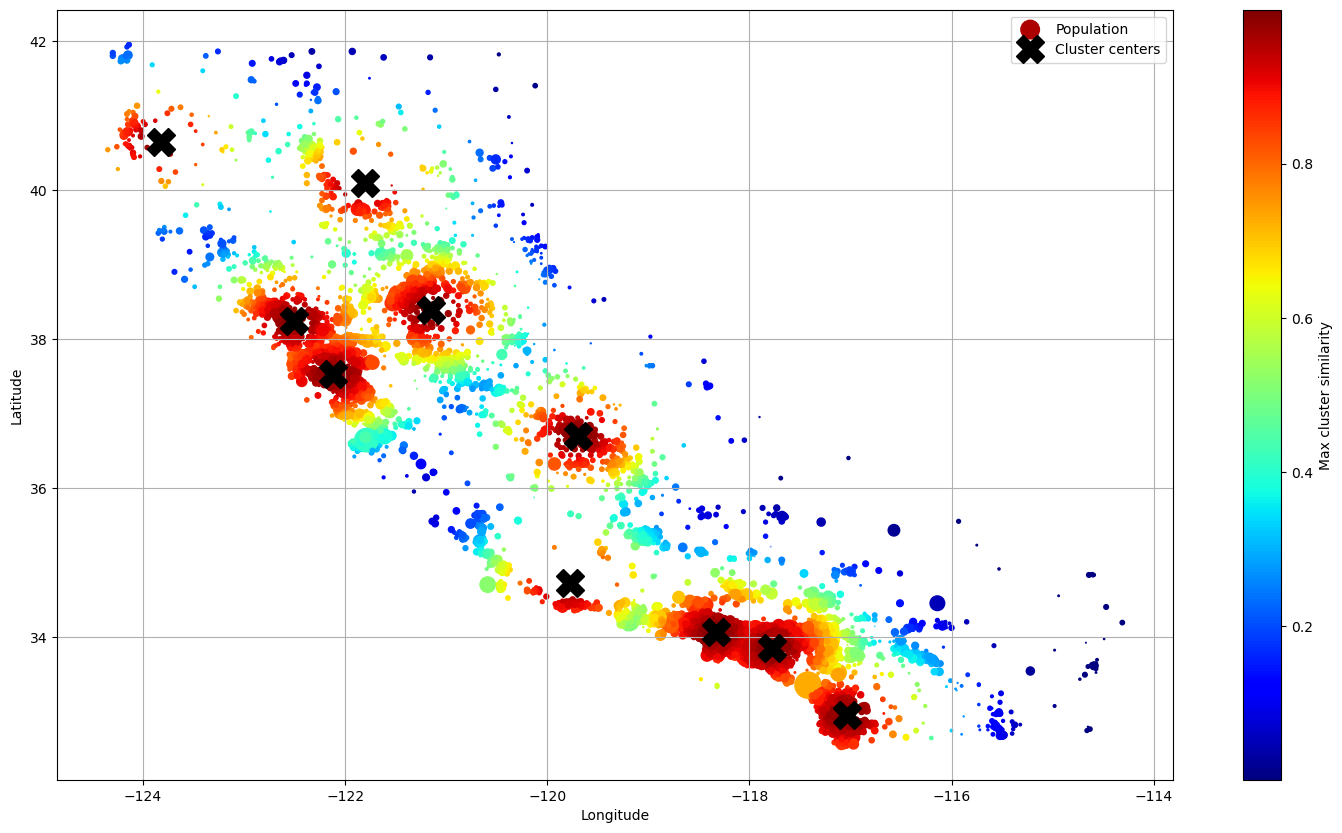

In [31]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(18, 10))
plt.plot(cluster_similarity.kmeans_.cluster_centers_[:, 1],
         cluster_similarity.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

# Preparing our Data for Machine Learning Algorithms
---
* <span style='font-size:18px'>Now that we gained some insights from our dataset, it’s time to prepare the data for your machine learning algorithms. Instead of doing this manually, you should write functions for this purpose, for several good reasons:</span>
  * <span style='font-size:16px'>This will allow you to reproduce these transformations easily on any dataset (e.g.,the next time you get a fresh dataset).</span>
  * <span style='font-size:16px'>You will gradually build a library of transformation functions that you can reuse in future projects.</span>
  * <span style='font-size:16px'>You can use these functions in your live system to transform the new data before feeding it to your algorithms.</span>
  * <span style='font-size:16px'>This will make it possible for you to easily try various transformations and see which combination of transformations works best.</span>

In [32]:
housing = strat_train_set.drop(columns=['median_house_value'])
housing_labels = strat_train_set['median_house_value'].copy()

## Dealing with Missing Data
---
<span style='font-size:15px'>Most machine learning algorithms cannot work with missing features, so you’ll need to take care of these. For example, you noticed earlier that the total_bedrooms attribute has some missing values. You have three options to fix this:</span>
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the missing values to some value (zero, the mean, the median, etc.). This is called _imputation_.
<br>

<span style='font-size:15px'>In our case we will be using a handy Scikit-Learn class: **SimpleImputer**.  The benefit is that it will store the median value of each feature: this will make it possible to impute missing values not only on the training set, but also on the validation set, the test set, and any new data fed to the model. To use it, first you need to create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:</span>


In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy='median') # We decided to go by using the median of the bedrooms.

In [35]:
housing_num = housing.select_dtypes(include=[np.number]) # We need to do this before running SimpleImputer because it only works with numerical data.
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_ # This is the median that was stored by the instance of SimpleImputer

array([-118.5   ,   34.25  ,   29.    , 2119.    ,  435.    , 1166.    ,
        409.    ,    3.5331])

<span style='color:red; font-size: 20px'> **NOTE:** <br></span>
<span style='color:yellow; font-size: 20px'>I said before that the SimpleImputer only works with numerical data. Well, it is only true when we are aiming to fill the values with the *mean* or the *median*, but this Class supports other strategies, like the **most frequent value** (strategy = 'most_frequent') or a **constant** (strategy = 'constant', fill_value=...)</span>

In [37]:
X = imputer.transform(housing_num)

<span style='font-size: 16px'>
    Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matrices) even when they are fed Pandas DataFrames as input.11 So, the output of imputer.transform(housing_num) is a NumPy array: X has neither column names nor index. Luckily, it’s not too hard to wrap X in a DataFrame and recover the column names and index from housing_num:
</span>

In [38]:
housing_transformed = pd.DataFrame(data=X, columns=housing_num.columns, index=housing_num.index)

# Handling Text Categorical Attributes:
---
<span style='font-size: 20px'>So far we have only dealt with numerical attributes, but your data may also contain text attributes. In this dataset, there is just one: the ocean_proximity attribute. Let’s look at its value for the first few instances:<span>

In [39]:
housing_categorical = housing[['ocean_proximity']]
housing_categorical.head(10)

,ocean_proximity
13843,NEAR OCEAN
3187,NEAR BAY
1121,<1H OCEAN
12909,<1H OCEAN
9040,<1H OCEAN
225,INLAND
135,<1H OCEAN
4605,INLAND
1433,INLAND
10129,INLAND


<span style='font-size:20px'>
    How do identify if a feature is categorical or simply a textual attribute?
</span>

___

<span style='font-size:16px'>
    If it’s not arbitrary text: there are a limited number of possible values, each of which represents a category. So this attribute is a categorical attribute. Most machine learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:
</span>

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
ordinal_encoder = OrdinalEncoder()
housing_categorical_encoded = ordinal_encoder.fit_transform(housing_categorical)

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<br><span style='font-size:20px'>One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "&lt;1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the category is "INLAND" (and 0 otherwise), and so on. This is called **one-hot encoding**, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called *dummy* attributes. Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors:
</span><br><br>

In [43]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
housing_categorical_onehotencoded = one_hot_encoder.fit_transform(housing_categorical)

In [44]:
housing_categorical_onehotencoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

<br><br><span style='font-size:20px'>
    A sparse matrix is a very efficient representation for matrices that contain mostly zeros. Indeed, internally it only stores the nonzero values and their positions. When a categorical attribute has hundreds or thousands of categories, one-hot encoding it results in a very large matrix full of 0s except for a single 1 per row. In this case, a sparse matrix is exactly what you need: it will save plenty of memory and speed up computations. You can use a sparse matrix mostly like a normal 2D array,12 but if you want to convert it to a (dense) NumPy array, just call the toarray() method:
</span>

In [45]:
housing_categorical_onehotencoded.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

<br><br><span style='font-size:20px'>
When you fit any Scikit-Learn estimator using a DataFrame, the estimator stores the column names in the feature_names_in_ attribute. Scikit-Learn then ensures that any DataFrame fed to this estimator after that (e.g., to transform() or predict()) has the same column names. Transformers also provide a get_feature_names_out() method that you can use to build a DataFrame around the transformer’s output, making it way easier:
</span>

In [46]:
display(one_hot_encoder.feature_names_in_)
print()
display(one_hot_encoder.get_feature_names_out())

array(['ocean_proximity'], dtype=object)

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [47]:
pd.DataFrame(one_hot_encoder.transform(housing_categorical).toarray(),
             columns=one_hot_encoder.get_feature_names_out(),
             index=housing_categorical.index)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13843,0.0,0.0,0.0,0.0,1.0
3187,0.0,0.0,0.0,1.0,0.0
1121,1.0,0.0,0.0,0.0,0.0
12909,1.0,0.0,0.0,0.0,0.0
9040,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2290,1.0,0.0,0.0,0.0,0.0
2542,1.0,0.0,0.0,0.0,0.0
6273,0.0,0.0,0.0,1.0,0.0
18450,1.0,0.0,0.0,0.0,0.0


# Feature Scalling and Transformation
---
<span style='font-size:18px'>One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, machine learning algorithms don’t perform well when the input numerical attributes have very different scales. <br>This is the case for the housing data: the total number of rooms ranges from about <strong>6</strong> to <strong>39,320</strong>, while the median incomes only range from <strong>0</strong> to <strong>15</strong>. Without any scaling, most models will be biased toward ignoring the median income and focusing more on the number of rooms.<br>There are two common ways to get all attributes to have the same scale: *min-max scaling* and *standardization*.</span><br><br>

## Min-Max Scaling
---
<span style='font-size:18px'>Min-max scaling (many people call this normalization) is the simplest: for each attribute, the values are shifted and rescaled so that they end up ranging from 0 to 1. This is performed by subtracting the min value and dividing by the difference between the min and the max. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1 (e.g., neural networks work best with zero-mean inputs, so a range of –1 to 1 is preferable). It’s quite easy to use:</span>

In [48]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_min_max = min_max_scaler.fit_transform(housing_num)

display(pd.DataFrame(data=housing_min_max, 
                     columns=min_max_scaler.feature_names_in_, 
                     index=housing_num.index))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13843,0.446215,-0.957447,-0.294118,-0.855701,-0.780881,-0.887833,-0.795757,-0.843878
3187,-0.583665,0.136170,1.000000,-0.804719,-0.835506,-0.932621,-0.834567,-0.147198
1121,0.318725,-0.791489,-0.921569,-0.663319,-0.714773,-0.880826,-0.730965,0.019517
12909,-0.511952,0.008511,-0.019608,-0.905364,-0.924581,-0.965077,-0.920079,0.014827
9040,0.314741,-0.776596,-0.843137,-0.739449,-0.639044,-0.903361,-0.688538,-0.393098
...,...,...,...,...,...,...,...,...
2290,0.284861,-0.676596,0.372549,-0.946909,-0.949410,-0.974046,-0.951324,-0.261803
2542,0.306773,-0.734043,-0.607843,-0.444682,-0.497517,-0.753020,-0.466864,-0.148963
6273,-0.571713,0.110638,0.490196,-0.858337,-0.815022,-0.894336,-0.823713,-0.757755
18450,0.209163,-0.682979,0.490196,-0.939212,-0.865922,-0.896073,-0.860878,-0.769700


## Standardization
---
<span style='font-size:18px'>Standardization is different: first it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so standardized values have a standard deviation equal to 1). Unlike min-max scaling, standardization does not restrict values to a specific range. However, standardization is much less affected by outliers. For example, suppose a district has a median income equal to <strong>100</strong> (by mistake), instead of the usual <strong>0 – 0.15</strong>. Min-max scaling to the <strong>0 – 1</strong> range would map this outlier down to 1 and it would crush all the other values down to <strong>0 – 0.15</strong>, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for *standardization*:</span>

In [49]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
housing_standard_scaler = standard_scaler.fit_transform(housing_num)

display(pd.DataFrame(housing_standard_scaler,
                     columns=standard_scaler.feature_names_in_,
                     index=housing_num.index))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13843,1.239518,-1.350992,-0.767163,0.050062,0.405351,0.507214,0.322848,-1.178613
3187,-1.347509,1.062648,1.848185,0.494908,-0.013233,-0.193130,0.014165,1.481369
1121,0.919267,-0.984720,-2.035211,1.728698,0.911933,0.616780,0.838192,2.117900
12909,-1.167368,0.780900,-0.212392,-0.383282,-0.695809,-0.700639,-0.665985,2.099995
9040,0.909259,-0.951849,-1.876705,1.064420,1.492242,0.264416,1.175651,0.542502
...,...,...,...,...,...,...,...,...
2290,0.834200,-0.731147,0.580137,-0.745783,-0.886075,-0.840883,-0.914501,1.043796
2542,0.889243,-0.857933,-1.401187,3.636427,2.576754,2.615259,2.938808,1.474628
6273,-1.317485,1.006299,0.817896,0.027061,0.143736,0.405537,0.100492,-0.849789
18450,0.644051,-0.745234,0.817896,-0.678619,-0.246308,0.378364,-0.195112,-0.895395


In [50]:
from sklearn.metrics.pairwise import rbf_kernel

age_similarity_to_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

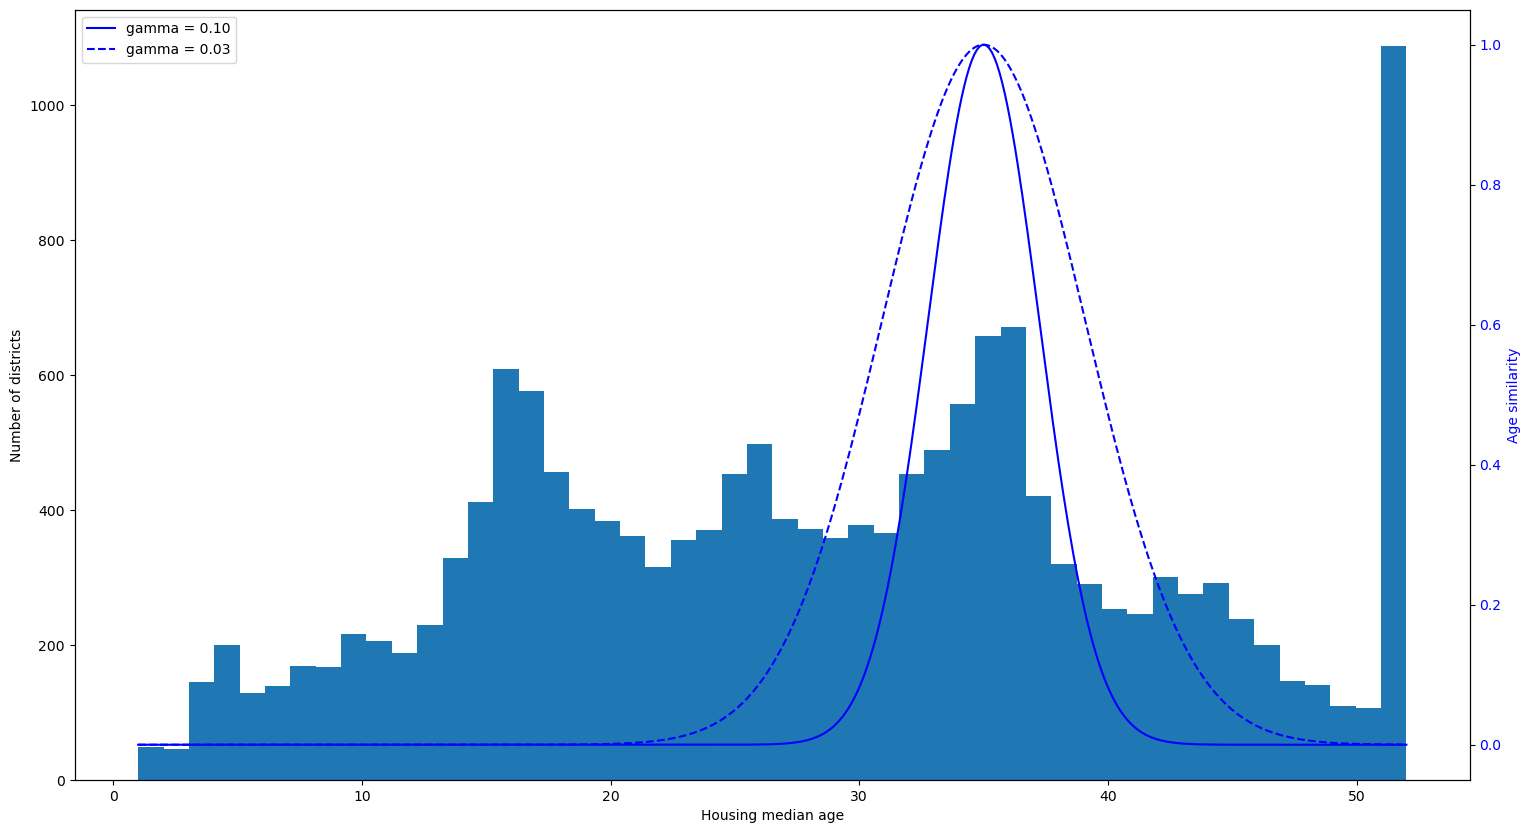

In [51]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots(figsize=(18,10))

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

<span style='color:red; font-size:35px'>Important <strong>NOTE:</strong></span><br>
<span style='font-size:20px'>
So far we’ve only looked at the input features, but the target values may also need to be transformed.<br>For example, if the target distribution has a heavy tail, you may choose to replace the target with its logarithm. But if you do, the regression model will now predict the log of the median house value, not the median house value itself. You will need to compute the exponential of the model’s prediction if you want the predicted median house value.<br>Luckily, most of Scikit-Learn’s transformers have an inverse_transform() method, making it easy to compute the inverse of their transformations. For example, the following code example shows how to scale the labels using a StandardScaler (just like we did for inputs), then train a simple linear regression model on the resulting scaled labels and use it to make predictions on some new data, which we transform back to the original scale using the trained scaler’s inverse_transform() method.<br> Note that we convert the labels from a Pandas Series to a DataFrame, since the StandardScaler expects 2D inputs. Also, in this example we just train the model on a single raw input feature (median income), for simplicity:
</span><br><br>

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

target_scaler = StandardScaler()
scaled_target_labels = target_scaler.fit_transform(housing_labels.to_frame())

linear_model = LinearRegression()
linear_model.fit(housing[['median_income']], scaled_target_labels)
new_unseen_data = housing[['median_income']].iloc[:15] # Let's pretend this is a new data that we got.

scaled_predictions = linear_model.predict(new_unseen_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

display(predictions)

array([[113340.92320321],
       [323392.22832515],
       [373657.32682067],
       [372243.39999942],
       [249252.55959195],
       [252413.10189828],
       [221897.23420901],
       [193306.80216163],
       [175911.34365193],
       [211259.51418324],
       [164175.75103553],
       [170492.67703989],
       [302349.67033828],
       [176476.91438043],
       [165543.93316551]])

<br><br><span style='font-size:20px'>
This works fine, but a simpler option is to use a TransformedTargetRegressor. We just need to construct it, giving it the regression model and the label transformer, then fit it on the training set, using the original unscaled labels. It will automatically use the transformer to scale the labels and train the regression model on the resulting scaled labels, just like we did previously. Then, when we want to make a prediction, it will call the regression model’s predict() method and use the scaler’s inverse_trans form() method to produce the prediction:
</span><br>

In [53]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor=LinearRegression(),
                                   transformer=StandardScaler())

model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(new_unseen_data)

display(predictions)

array([113340.92320321, 323392.22832515, 373657.32682067, 372243.39999942,
       249252.55959195, 252413.10189828, 221897.23420901, 193306.80216163,
       175911.34365193, 211259.51418324, 164175.75103553, 170492.67703989,
       302349.67033828, 176476.91438043, 165543.93316551])


## Creating the StandardScaler by Hand:
---
<span style='font-size:18px'>Lets try creating the StandardScaler by ourselves and see if that works fine</span>

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerHandmade(BaseEstimator, TransformerMixin):
    def __init__(self, use_mean=True):
        self.use_mean = use_mean

    def fit(self, X, y=None): # For compatibility the fit method always need to have "y", even if it is always None.
        X = check_array(X) # this will verify if X is an Array with a finite number of float values.
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # Every estimator stores this in fit()
        if type(X) == pd.core.frame.DataFrame:
            self.feature_names_in_ = X.columns
        return self # Always return self!!!
    
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.use_mean == True:
            X = X - self.mean_
        return X / self.std_
        

---

<span style='font-size:18px'>Now let's run it!</span>

---

In [55]:
our_stardardscaler = StandardScalerHandmade(use_mean=True)

data_without_nan = housing_num.dropna()

our_stardardscaler.fit(data_without_nan)
housing_num_scaled_with_our_class = our_stardardscaler.transform(data_without_nan)

display(pd.DataFrame(data=housing_num_scaled_with_our_class,
                     columns=housing_num.columns,
                     index=data_without_nan.index))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13843,1.239865,-1.351194,-0.765921,0.049500,0.405351,0.507671,0.323524,-1.180160
3187,-1.347157,1.062013,1.847654,0.493549,-0.013233,-0.192333,0.014683,1.481465
1121,0.919614,-0.984987,-2.033108,1.725131,0.911933,0.617184,0.839133,2.118390
12909,-1.167016,0.780315,-0.211526,-0.383069,-0.695809,-0.699596,-0.665816,2.100473
9040,0.909606,-0.952123,-1.874710,1.062042,1.492242,0.264991,1.176765,0.542019
...,...,...,...,...,...,...,...,...
2290,0.834548,-0.731460,0.580466,-0.744921,-0.886075,-0.839772,-0.914460,1.043622
2542,0.889591,-0.858223,-1.399514,3.629446,2.576754,2.614694,2.940828,1.474720
6273,-1.317134,1.005673,0.818064,0.026540,0.143736,0.406043,0.101054,-0.851132
18450,0.644399,-0.745545,0.818064,-0.677878,-0.246308,0.378884,-0.194702,-0.896766



## Creating a Pipeline
---
<span style='font-size:18px'>Now that we learned the basics about imputers, scalers and transformers, why don't we create a pipeline that does all the stuff for us, even handling with numerical and categorical data automatically?</span><br><br>

In [56]:
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

numerical_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())


# preprocessing = ColumnTransformer([
#     ("numerical", numerical_pipeline, make_column_selector(dtype_include=np.number)),
#     ("categorical", categorical_pipeline, make_column_selector(dtype_include=object)),
# ]) 

preprocessing = make_column_transformer(
    (numerical_pipeline, make_column_selector(dtype_include=np.number)),
    (categorical_pipeline, make_column_selector(dtype_include=object)),
) 

---

<span style='font-size:18px'>And what if we want to do it all in one big step?</span>

---

In [57]:
from sklearn.preprocessing import FunctionTransformer

# Creating the function that calculates the ratio of 2 values
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

# Creating the function to return the feature names out
def ratio_name(function_transformer, feature_names_in):
    return['ratio'] # feature names out

# Creating the pipeline to be executed on values that we want to calculate their ratio (e.g. the % of rooms represented by bedrooms aka. "bedrooms_ratio")
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

# Creating the pipeline to be executed on values that have a heavy-tail, returning the log of the values.
log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler())

cluster_similarity = SimilarityCluster(n_clusters=10, gamma=1., random_state=42)

# Creating the pipeline to be executed on everything numerical that is a remainder
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())

# Creating the main pipeline that compiles all others.
preprocessing = ColumnTransformer([
    ('bedrooms_ratio', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ('rooms_per_house', ratio_pipeline(), ['total_rooms', 'households']),
    ('people_per_house', ratio_pipeline(), ['population', 'households']),
    ('log', log_pipeline, ['total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']),
    ('geo_sim', cluster_similarity, ['latitude', 'longitude']),
    ('categorical', categorical_pipeline, make_column_selector(dtype_include=object))
], remainder=default_num_pipeline)

In [58]:
housing_prepared = preprocessing.fit_transform(housing)

In [59]:
preprocessing.get_feature_names_out()

array(['bedrooms_ratio__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo_sim__Cluster 0 Similarity',
       'geo_sim__Cluster 1 Similarity', 'geo_sim__Cluster 2 Similarity',
       'geo_sim__Cluster 3 Similarity', 'geo_sim__Cluster 4 Similarity',
       'geo_sim__Cluster 5 Similarity', 'geo_sim__Cluster 6 Similarity',
       'geo_sim__Cluster 7 Similarity', 'geo_sim__Cluster 8 Similarity',
       'geo_sim__Cluster 9 Similarity',
       'categorical__ocean_proximity_<1H OCEAN',
       'categorical__ocean_proximity_INLAND',
       'categorical__ocean_proximity_ISLAND',
       'categorical__ocean_proximity_NEAR BAY',
       'categorical__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__income_category'],
      dtype=object)

In [60]:
pd.DataFrame(data=housing_prepared, 
             columns=preprocessing.get_feature_names_out(), 
             index=housing.index)

,bedrooms_ratio__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo_sim__Cluster 0 Similarity,geo_sim__Cluster 1 Similarity,...,geo_sim__Cluster 7 Similarity,geo_sim__Cluster 8 Similarity,geo_sim__Cluster 9 Similarity,categorical__ocean_proximity_<1H OCEAN,categorical__ocean_proximity_INLAND,categorical__ocean_proximity_ISLAND,categorical__ocean_proximity_NEAR BAY,categorical__ocean_proximity_NEAR OCEAN,remainder__housing_median_age,remainder__income_category
13843,0.676463,-0.431336,0.013217,0.703419,0.385306,0.782848,0.619585,-1.606494,1.974807e-01,1.123740e-21,...,3.786337e-21,8.660174e-48,1.735597e-27,0.0,0.0,0.0,0.0,1.0,-0.767163,-0.954687
3187,-1.072991,0.814475,-0.062830,0.311096,0.786834,0.096926,0.333380,1.394239,1.430255e-17,8.708670e-01,...,2.376256e-01,2.484951e-05,7.127795e-01,0.0,0.0,0.0,1.0,0.0,1.848185,1.890078
1121,-1.061735,1.003093,-0.043737,1.064323,1.509878,0.864441,0.993925,1.748084,7.355991e-01,4.476817e-16,...,1.367357e-15,4.151082e-39,4.514487e-21,1.0,0.0,0.0,0.0,0.0,-2.035211,1.890078
12909,-1.187232,0.819365,-0.046842,-0.754574,-0.174404,-0.786169,-0.653554,1.738894,3.129972e-14,8.944387e-01,...,2.030955e-01,1.636128e-07,1.936351e-01,1.0,0.0,0.0,0.0,0.0,-0.212392,1.890078
9040,0.330867,-0.088526,-0.114914,1.386718,1.169587,0.582250,1.192929,0.733792,7.696793e-01,9.314569e-16,...,3.034632e-15,1.455080e-38,1.076458e-20,1.0,0.0,0.0,0.0,0.0,-1.876705,0.941823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,-0.779654,0.568930,0.004583,-1.299065,-0.940860,-1.184191,-1.324594,1.111650,7.808601e-01,1.106502e-13,...,5.391742e-13,6.020440e-35,3.236594e-18,1.0,0.0,0.0,0.0,0.0,0.580137,0.941823
2542,-0.913161,0.452044,-0.032870,1.839747,2.174242,1.846124,1.923613,1.390158,8.373749e-01,6.147861e-15,...,2.490826e-14,4.044169e-37,1.033492e-19,1.0,0.0,0.0,0.0,0.0,-1.401187,1.890078
6273,0.126413,-0.176267,0.040119,0.471654,0.360840,0.702443,0.419667,-0.916896,6.420957e-17,9.449659e-01,...,2.427657e-01,1.018967e-05,5.989240e-01,0.0,0.0,0.0,1.0,0.0,0.817896,-0.954687
18450,2.455258,-1.140682,0.119176,0.031487,-0.761396,0.680118,0.098224,-1.000200,4.678842e-01,1.904224e-12,...,4.215144e-12,2.731073e-33,7.329999e-17,1.0,0.0,0.0,0.0,0.0,0.817896,-0.954687


<br>
<span style='font-size:16px'>Great! All seems to be working, so let's move, finally, to the Model Selection and Training!</span>
<br><br>

# Select and Train a Model
---
<span style='font-size:16px'>🔥🔥🔥<br>
    At last! We framed the problem, we got the data and explored it, we sampled a training set and a test set, and we wrote a preprocessing pipeline to automatically clean up and prepare our data for machine learning algorithms. We are now ready to select and train a machine learning model! <br>
    🔥🔥🔥</span>

<br><br>

## Train and Evaluate on the Training Set:
---

<span style='font-size:16px'>Let's begin with a very simple algorithm: the <strong>Linear Regression</strong></span>

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name a...
                                                   'households',
                                                   'median_income']),
                                                 ('geo_sim',
                                                  SimilarityCluster(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015CFAB080D0>)])),
                ('linearregression', LinearRegression())])

In [62]:
housing_predictions = lin_reg.predict(housing)
print("Predicted:")
display(housing_predictions[:5].round(-2)) # round(-2) is the same of saying "round to the nearest hundred".
print()
print("True value:")
display(housing_labels.iloc[:5].values)

diferences = []
for i,j in zip(housing_predictions[:5].round(-2), housing_labels.iloc[:5].values):
    diferences.append(i - j)
print("Diferences:", end=" ")
for _ in diferences:
    print(_, end=" ")

Predicted:


array([109000., 372700., 319000., 374200., 286000.])


True value:


array([117700., 370900., 420600., 424600., 255600.])

Diferences: -8700.0 1800.0 -101600.0 -50400.0 30400.0 

<br>

<span style='font-size:16px'>As we can see in the above output, the Diferences between the value predicted and the true value is very big, meaning our RMSE must be bad, let's check it out!</span>

<br>

In [63]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

print(f"US${lin_rmse.round(-2)}")

US$68300.0


<br>

<span style='font-size:16px'>68,300.00 is a lot of money! No one want's to receive 68,300.00 less or pay 68,300.00 more, right? So we need to fix our model to be a better predictor.</span>

<br>

<span style='color:red; font-size: 20px'> **Terminology Alert:** <br></span>
<span style='font-size: 20px'>When we see that our error is too big for our model, we say that our model is <strong><u>Underfitting</u></strong> the training data!<br></span>
<span style='font-size: 20px'>When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. <br>The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, which rules out the last option. You could try to add more features, but first you want to try a more complex model to see how it does.</span>

<br>

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=101))
tree_regressor.fit(housing, housing_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name a...
                                                 ('geo_sim',
                                                  SimilarityCluster(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015CFAB080D0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=101))])

In [65]:
housing_predictions = tree_regressor.predict(housing)

decision_tree_mse = mean_squared_error(y_true=housing_labels, y_pred=housing_predictions, squared=False)

display(decision_tree_mse)

0.0

<span style='color:red; font-size: 20px'> **Terminology Alert:** <br></span>
<span style='font-size: 20px'>When we see that our error is zero or very very small, we say that our model is <strong><u>Overfitting</u></strong> the training data!<br></span>
<span style='font-size: 20px'>When this happens it can mean that the model is sticking perfectly to the training data, predicting even the noise from the data, which makes the variance in unseen data very big, deprecating the prediction capacity of our model.<br><br>But how can we be sure about that?<br>As we saw earlier, we don’t want to touch the test set until we are ready to launch a model we are confident about, so we need to use part of the training set for training and part of it for model validation. <br><br>
A way of doing it is to use Scikit-Learn’s k_-fold cross-validation feature. The following code randomly splits the training set into 10 non-overlapping subsets called folds, then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training. The result is an array containing the 10 evaluation scores:</span>

<br>

In [66]:
from sklearn.model_selection import cross_val_score

tree_cv_rmses = -cross_val_score(estimator=tree_regressor,
                                 X=housing,
                                 y=housing_labels,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10)

In [67]:
pd.Series(tree_cv_rmses).describe()

count       10.000000
mean     66105.869136
std       1648.827356
min      62932.492648
25%      65518.980757
50%      66144.901274
75%      66948.427431
max      69140.154745
dtype: float64

<br>

<span style='font-size: 20px'>Now the decision tree doesn’t look as good as it did earlier.<br>In fact, it seems to perform almost as poorly as the linear regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). The decision tree has an RMSE of about 66,105, with a standard deviation of about 1,648. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always feasible.</span><br><br>
<span style='font-size: 20px'>Let’s try one last model now: the RandomForestRegressor. Random Forests work by training many decision trees on random subsets of the features, then averaging out their predictions. Such models composed of many other models are called ensembles: they are capable of boosting the performance of the underlying model (in this case, decision trees) (GÉRON, 2023). The code is much the same as earlier:</span>

<br>

In [68]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=101))

cv_rand_forest = -cross_val_score(estimator=rand_forest_reg, 
                                  X=housing, 
                                  y=housing_labels, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=10)
display(pd.Series(cv_rand_forest).describe())

count       10.000000
mean     47179.482377
std       2395.001021
min      44364.881618
25%      45774.895528
50%      46650.161665
75%      48330.193673
max      52126.493339
dtype: float64

In [70]:
rand_forest_reg.fit(housing, housing_labels)

housing_predicted = rand_forest_reg.predict(housing)

print(mean_squared_error(y_true=housing_labels, y_pred=housing_predicted, squared=False))

17503.518216218


<br>

<span style='font-size: 20px'>It is notable the difference when we use the whole training set for RandomForest (17,503) and when we use Cross Validation (47,179). It indicates that our model is still overfitting the treining set. <br>
One possible way to solve that is by doing hyperparameter tuning.</span>

<br>

<span style='font-size: 15px'>

# Fine-Tune Your Model
    
</span>

---

<span style='font-size: 20px'> One option would be to fiddle with the hyperparameters manually, until we find a great combination of hyperparameter values. This would be very tedious work, and we may not have time to explore many combinations. Instead, we will use Scikit-Learn’s GridSearchCV class to search for us. All we need to do is tell it which hyperparameters we want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations.</span>

<br>

## Grid Search
---

In [71]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=101))
])
parameters_grid = [
    {'preprocessing__geo_sim__n_clusters': [3, 5, 7, 9],
     'random_forest__max_features': [4, 6]},
    {'preprocessing__geo_sim__n_clusters': [4, 6, 8],
     'random_forest__max_features':[3, 5]}
]

grid_search = GridSearchCV(full_pipeline, parameters_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms_ratio',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000015CFAB080D0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=101))]),
             param_grid=[{'preprocessing__geo_sim__n_clusters': [3, 5, 7, 9],
                          'random_forest__max_features': [4, 6]},
                         {'preprocessing__geo_sim__n_clusters': [4, 6, 8],
                          'random_forest__max_features': [3, 5]}],
             scoring='neg_root_mean_squared_error')

In [72]:
grid_search.best_params_

{'preprocessing__geo_sim__n_clusters': 9, 'random_forest__max_features': 6}

In [77]:
grid_cv_results = pd.DataFrame(grid_search.cv_results_)
grid_cv_results.sort_values(by='mean_test_score',ascending=False, inplace=True)
grid_cv_results['mean_test_score'] = -grid_cv_results['mean_test_score']
grid_cv_results.rename({'split0_test_score':'split_0', 'split1_test_score':'split_1',
                        'split2_test_score':'split_2', 'mean_test_score':'mean_test_RMSE'}, axis=1, inplace=True)
display(grid_cv_results.iloc[:, 6:])

,params,split_0,split_1,split_2,mean_test_RMSE,std_test_score,rank_test_score
7,"{'preprocessing__geo_sim__n_clusters': 9, 'ran...",-47629.394222,-45325.152566,-46877.130335,46610.559041,959.401755,1
6,"{'preprocessing__geo_sim__n_clusters': 9, 'ran...",-47478.393142,-45467.495251,-47137.042554,46694.310316,878.611199,2
13,"{'preprocessing__geo_sim__n_clusters': 8, 'ran...",-47461.114001,-45948.088387,-47226.416488,46878.539625,664.868589,3
12,"{'preprocessing__geo_sim__n_clusters': 8, 'ran...",-48067.544513,-46708.807755,-47461.516804,47412.623024,555.778341,4
5,"{'preprocessing__geo_sim__n_clusters': 7, 'ran...",-48141.743405,-46165.704612,-47933.941827,47413.796615,886.602357,5
4,"{'preprocessing__geo_sim__n_clusters': 7, 'ran...",-48143.243304,-46342.279894,-47969.400803,47484.974667,811.118081,6
11,"{'preprocessing__geo_sim__n_clusters': 6, 'ran...",-48612.123584,-46578.441049,-48342.366739,47844.310457,901.854093,7
10,"{'preprocessing__geo_sim__n_clusters': 6, 'ran...",-49383.297039,-47561.760985,-48394.906302,48446.654775,744.538706,8
3,"{'preprocessing__geo_sim__n_clusters': 5, 'ran...",-49720.005429,-47448.772860,-48999.384415,48722.720901,947.639654,9
2,"{'preprocessing__geo_sim__n_clusters': 5, 'ran...",-49718.441118,-47877.006171,-48952.066887,48849.171392,755.275349,10


## Random Search
---

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters_distribution = {
    'preprocessing__geo_sim__n_clusters':randint(low=3, high=42),
    'random_forest__max_features':randint(low=2, high=47)
}

rnd_search = RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=parameters_distribution,
    n_iter=10,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=647
)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=101))]),
                   param_distributions={'preprocessing__geo_sim__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000015CFAB09300>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000015CFD987AC0>},
                   random_state=647, scoring='neg_root_mean_squared_error')

In [78]:
random_cv_results = pd.DataFrame(rnd_search.cv_results_)
random_cv_results.sort_values(by='mean_test_score',ascending=False, inplace=True)
random_cv_results['mean_test_score'] = -random_cv_results['mean_test_score']
random_cv_results.rename({'split0_test_score':'split_0', 'split1_test_score':'split_1',
                        'split2_test_score':'split_2', 'mean_test_score':'mean_test_RMSE'}, axis=1, inplace=True)
display(random_cv_results.iloc[:, 6:])

,params,split_0,split_1,split_2,mean_test_RMSE,std_test_score,rank_test_score
6,"{'preprocessing__geo_sim__n_clusters': 38, 'ra...",-43960.865866,-42074.249296,-42812.592220,42949.235794,776.244858,1
0,"{'preprocessing__geo_sim__n_clusters': 33, 'ra...",-44567.101304,-42604.719733,-43351.154465,43507.658501,808.746146,2
7,"{'preprocessing__geo_sim__n_clusters': 33, 'ra...",-45835.260613,-43246.127167,-44424.933390,44502.107057,1058.417004,3
8,"{'preprocessing__geo_sim__n_clusters': 14, 'ra...",-47174.266291,-45051.579944,-46814.947578,46346.931271,927.623767,4
4,"{'preprocessing__geo_sim__n_clusters': 26, 'ra...",-47706.370852,-45089.425108,-46932.439161,46576.078374,1097.678160,5
3,"{'preprocessing__geo_sim__n_clusters': 11, 'ra...",-48060.957968,-45555.987645,-47574.611694,47063.852436,1084.550704,6
2,"{'preprocessing__geo_sim__n_clusters': 21, 'ra...",-48298.201428,-45677.479306,-47491.278885,47155.653206,1095.910445,7
1,"{'preprocessing__geo_sim__n_clusters': 17, 'ra...",-48611.056281,-46118.559383,-48145.436446,47625.017370,1082.054283,8
5,"{'preprocessing__geo_sim__n_clusters': 4, 'ran...",-51855.418767,-48275.505904,-50480.761037,50203.895236,1474.547395,9
9,"{'preprocessing__geo_sim__n_clusters': 3, 'ran...",-51943.916055,-48634.183006,-50924.032749,50500.710603,1383.951936,10


## Ensemble Methods
    
</span>

---

<span style='font-size: 20px'> Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model, just like random forests perform better than the individual decision trees they rely on.</span>

<br>

In [84]:
final_model = rnd_search.best_estimator_ # This will return the best estimator, in our case: Random Forest, since we used this algorithm with the Random Search.
feature_importance = final_model['random_forest'].feature_importances_ # This will get the importance for each feature on our set.
display(feature_importance.round(2))

array([0.06, 0.04, 0.04, 0.01, 0.01, 0.01, 0.01, 0.12, 0.02, 0.01, 0.02,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.03,
       0.02, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01,
       0.  , 0.01, 0.  , 0.08, 0.  , 0.  , 0.  , 0.01, 0.1 ])

<br>

<span style='font-size: 20px'> Just looking at the above numbers is very hard to know what is the attribute the importance value is refeering to. Let's make this better.</span>

<br>

In [92]:
sorted(zip(
    feature_importance.round(6),
    final_model['preprocessing'].get_feature_names_out(),
), reverse=True)

[(0.123473, 'log__median_income'),
 (0.101261, 'remainder__income_category'),
 (0.075323, 'categorical__ocean_proximity_INLAND'),
 (0.06092, 'bedrooms_ratio__ratio'),
 (0.04375, 'rooms_per_house__ratio'),
 (0.042256, 'people_per_house__ratio'),
 (0.030078, 'geo_sim__Cluster 3 Similarity'),
 (0.026631, 'geo_sim__Cluster 24 Similarity'),
 (0.024594, 'geo_sim__Cluster 14 Similarity'),
 (0.020501, 'geo_sim__Cluster 2 Similarity'),
 (0.019914, 'geo_sim__Cluster 18 Similarity'),
 (0.019367, 'geo_sim__Cluster 26 Similarity'),
 (0.018453, 'geo_sim__Cluster 22 Similarity'),
 (0.018011, 'geo_sim__Cluster 15 Similarity'),
 (0.016605, 'geo_sim__Cluster 25 Similarity'),
 (0.016427, 'geo_sim__Cluster 33 Similarity'),
 (0.0159, 'geo_sim__Cluster 0 Similarity'),
 (0.015828, 'geo_sim__Cluster 29 Similarity'),
 (0.01492, 'geo_sim__Cluster 8 Similarity'),
 (0.01453, 'geo_sim__Cluster 13 Similarity'),
 (0.014032, 'geo_sim__Cluster 34 Similarity'),
 (0.013484, 'geo_sim__Cluster 30 Similarity'),
 (0.013409,

<span style='font-size: 15px'>

# Evaluate the Performance on the Test Set:
    
</span>

---

<span style='font-size: 20px'> After tweaking your models for a while, you eventually have a system that performs sufficiently well. You are ready to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set and run your final_model to transform the data and make predictions, then evaluate these predictions</span>

<br>

In [95]:
X_test_set = strat_test_set.drop(columns=['median_house_value'])
y_test_set = strat_test_set['median_house_value'].copy()

our_final_prediction = final_model.predict(X_test_set)

our_final_rmse = mean_squared_error(y_true=y_test_set, y_pred=our_final_prediction, squared=False)

print(our_final_rmse)

41882.77153811664


# Conclusion
---

<br>
<span style='font-size: 20px'>Now that we did all the hands-on programming part, comes the project prelaunch phase: we need to present our solution (highlighting what we have learned, what worked and what did not, what assumptions were made, and what our system’s limitations are), document everything, and create nice presentations with clear visualizations and easy-to-remember statements (e.g., “the median income is the number one predictor of housing prices”).</span>
<br>
<br>
<span style='font-size: 20px'>In this California housing example, the final performance of the system is not much better than the experts’ price estimates, which were often off by 30%, but it may still be a good idea to launch it, especially if this frees up some time for the experts so they can work on more interesting and productive tasks.</span>
<br>
<br>
<br>
<span style='font-size: 25px'><strong>Thank you for reading this Notebook. I hope it helped you somehow!</strong>❤️</span>